SDMX is an XML-based format and API for economic type time-series data, designed when everyone believed that XML would solve all of our problems. 

XML doesn't.  It's so hugely bloated, complicated and verbose when implemented properly, that many such projects are converting to JSON.  https://sdmx.org/?sdmx_news=public-release-of-the-sdmx-json-data-exchange-format-version-1-0

Ultimately, the file format and API doesn't matter, because once you have some open source software that does the work, we can just make use of the software everywhere -- kind of like how no one needs to know how the JPEG format works; they just use the libraries that can access it.  

Luckily, the same has happened to SDMX in that there is a python package called pandasdmx that does most of the job (and has better documentation, including worked examples) https://pandasdmx.readthedocs.io/en/latest/usage.html

In [99]:
# To get an idea of the underlying file format, here is the first 2kb of a file listing
# USD and EUR exchange rates

import urllib.request

url = "https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.USD.EUR.SP00.A"
fname = "xdmsdata.xml"
urllib.request.urlretrieve(url, fname)
print(open(fname).read(2400))

<?xml version="1.0" encoding="UTF-8"?><message:GenericData xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic" xsi:schemaLocation="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message http://sdw-wsrest.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXMessage.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common http://sdw-wsrest.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXCommon.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic http://sdw-wsrest.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXDataGeneric.xsd">
<message:Header>
<message:ID>79a6f401-36e0-4798-943b-6329a88cf391</message:ID>
<message:Test>false</message:Test>
<message:Prepared>2019-02-26T16:00:09.570+01:00</message:Prepared>
<message:Sender id="ECB"/>
<message:Structure structureID="ECB_EX

In [101]:
# Luckily there is this python library which can parse that XML into a pandas dataframe object
import pandasdmx

psdreq = pandasdmx.Request()
rpsdreq = psdreq.get(fromfile="xdmsdata.xml")
df = rpsdreq.write()
df.head()

FREQ,D
CURRENCY,USD
CURRENCY_DENOM,EUR
EXR_TYPE,SP00
EXR_SUFFIX,A
TIME_PERIOD,
1999-01-04,1.1789
1999-01-05,1.1790
1999-01-06,1.1743
1999-01-07,1.1632
1999-01-08,1.1659


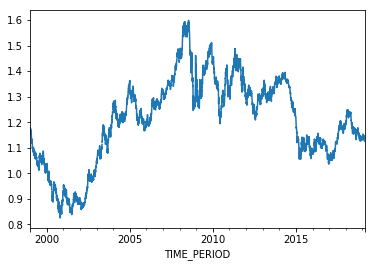

In [103]:
# By working through the 5-layer deep multi-index We can plot this series of data, like so:
%matplotlib inline
df["D"]["USD"]["EUR"]["SP00"]["A"].plot()

In [131]:
# That was an example of downloading an XML file, parsing it with pandasdmx and plotting it.  

# We can also access this data through the API, which is also handled by pandasdmx
import pandasdmx
ecb = pandasdmx.Request('ECB')
print(ecb.list_agencies())
exr_flow = ecb.dataflow('EXR')
dsd = exr_flow.dataflow.EXR.structure()
data_response = pandasdmx.Request('ecb_s').data(resource_id = 'EXR',
                    key={'CURRENCY': ['USD', 'JPY'], 'FREQ':'D'},
                    params = {'startPeriod': '2017'}, dsd=dsd)
df = data_response.write()
print(data_response.url)

['', 'ABS', 'ECB', 'ECB_S', 'ESTAT', 'ESTAT_S', 'ILO', 'IMF_SDMXCENTRAL', 'INEGI', 'INEGI_S', 'INSEE', 'INSEE_S', 'ISTAT', 'ISTAT_S', 'NB', 'NB_S', 'OECD', 'SGR', 'UNESCO', 'UNSD', 'WBG_WITS']
http://sdw-wsrest.ecb.int/service/data/EXR/D.USD+JPY...?startPeriod=2017


In [121]:
df.head()

FREQ                 D        
CURRENCY           JPY     USD
CURRENCY_DENOM     EUR     EUR
EXR_TYPE          SP00    SP00
EXR_SUFFIX           A       A
TIME_PERIOD                   
2017-01-02      122.92  1.0465
2017-01-03      122.75  1.0385
2017-01-04      122.64  1.0437
2017-01-05      122.38  1.0501
2017-01-06      122.83  1.0589

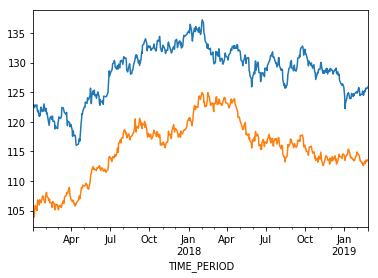

In [123]:
# We can plot these both here
%matplotlib inline
df["D"]["JPY"]["EUR"]["SP00"]["A"].plot()
(df["D"]["USD"]["EUR"]["SP00"]["A"]*100).plot()


In [127]:
dsd.attributes.aslist()

[DataAttribute | BREAKS,
 DataAttribute | COLLECTION,
 DataAttribute | COMPILATION,
 DataAttribute | COMPILING_ORG,
 DataAttribute | COVERAGE,
 DataAttribute | DECIMALS,
 DataAttribute | DISS_ORG,
 DataAttribute | DOM_SER_IDS,
 DataAttribute | NAT_TITLE,
 DataAttribute | OBS_COM,
 DataAttribute | OBS_CONF,
 DataAttribute | OBS_PRE_BREAK,
 DataAttribute | OBS_STATUS,
 DataAttribute | PUBL_ECB,
 DataAttribute | PUBL_MU,
 DataAttribute | PUBL_PUBLIC,
 DataAttribute | SOURCE_AGENCY,
 DataAttribute | SOURCE_PUB,
 DataAttribute | TIME_FORMAT,
 DataAttribute | TITLE,
 DataAttribute | TITLE_COMPL,
 DataAttribute | UNIT,
 DataAttribute | UNIT_INDEX_BASE,
 DataAttribute | UNIT_MULT]

In [130]:
dsd.name

{'en': 'Exchange Rates'}